In [1]:
from parser_java import get_unit_test_files, get_target_files
from file_metrics import  get_history_files
from plot_utils import plot_lines_test_vs_target_normalise_100, plot_lines_test_vs_target_dates, plot_lines_test_vs_target_numeric
from modfied_file import get_modifications_of_files
repo_path = "/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver"

In [2]:
import os

all_test_files = get_unit_test_files(repo_path)
map_files = get_target_files(repo_path, all_test_files)

all_files = [map_['test'] for map_ in map_files] + [map_['target'] for map_ in map_files]
all_files_info = get_modifications_of_files(repo_path, all_files)

map_files_info = []
for map_ in map_files:
    map_files_info.append({
        'test': all_files_info[map_['test']],
        'target': all_files_info[map_['target']]
    })

Total number of test files:  156
Total number of target files found:  133


In [3]:

map_before, map_same, map_after = get_history_files(map_files_info)

In [4]:
print("Before: " + str(len(map_before)))
print("Same: " + str(len(map_same)))
print("After: " + str(len(map_after)))


test_date = map_before[0]['test'][0]['commit'].committer_date
target_date = map_before[0]['target'][0]['commit'].committer_date
print("Test date: " + str(test_date))
print("Target date: " + str(target_date))

Before: 1
Same: 88
After: 44
Test date: 2011-10-26 09:35:04+02:00
Target date: 2022-10-25 10:23:35+02:00


# Files where test are created before the target file

## Diff of the test file and the target file

In [5]:

first_before = map_before[0]
print(first_before['test'][0])
print(first_before['target'])

{'commit': <pydriller.domain.commit.Commit object at 0x105884d60>, 'filename': 'TestFileUtils.java', 'change_type': <ModificationType.ADD: 1>, 'diff_parsed': {'added': [(1, '/*******************************************************************************'), (2, ' * Copyright (c) 2010, 2011 Sonatype, Inc.'), (3, ' * All rights reserved. This program and the accompanying materials'), (4, ' * are made available under the terms of the Eclipse Public License v1.0'), (5, ' * which accompanies this distribution, and is available at'), (6, ' * http://www.eclipse.org/legal/epl-v10.html'), (7, ' *'), (8, ' * Contributors:'), (9, ' *    Sonatype, Inc. - initial API and implementation'), (10, ' *******************************************************************************/'), (11, 'package org.eclipse.aether.test.util;'), (12, ''), (13, 'import java.io.BufferedOutputStream;'), (14, 'import java.io.Closeable;'), (15, 'import java.io.File;'), (16, 'import java.io.FileInputStream;'), (17, 'import ja

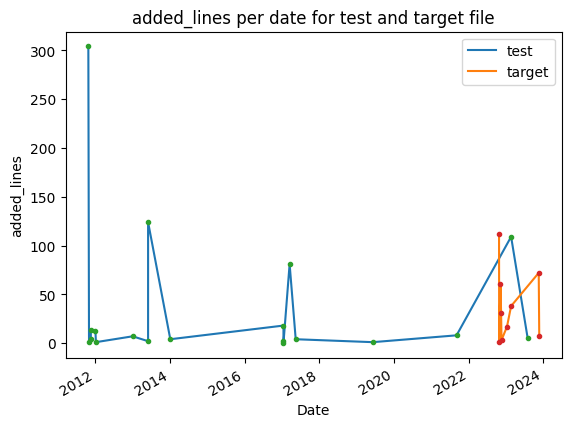

In [6]:
plot_lines_test_vs_target_dates(first_before['test'], first_before['target'], "added_lines")

## Add lines to the test file vs the target file

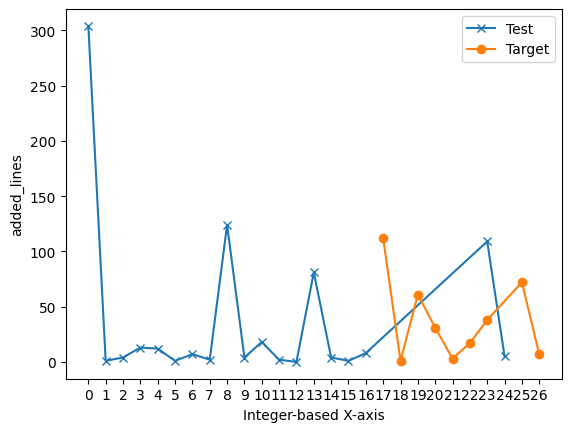

In [7]:
plot_lines_test_vs_target_numeric(first_before['test'], first_before['target'], "added_lines")

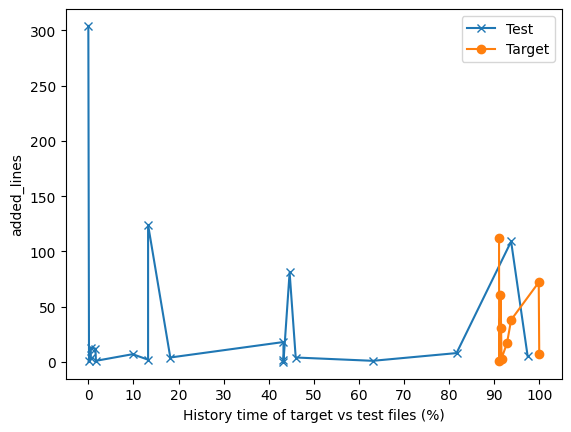

In [8]:
plot_lines_test_vs_target_normalise_100(first_before['test'], first_before['target'], 'added_lines')

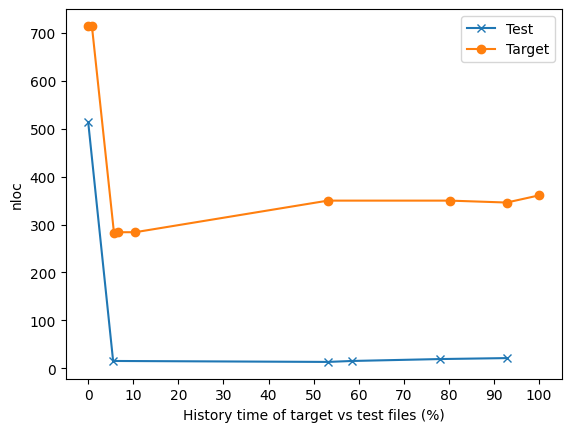

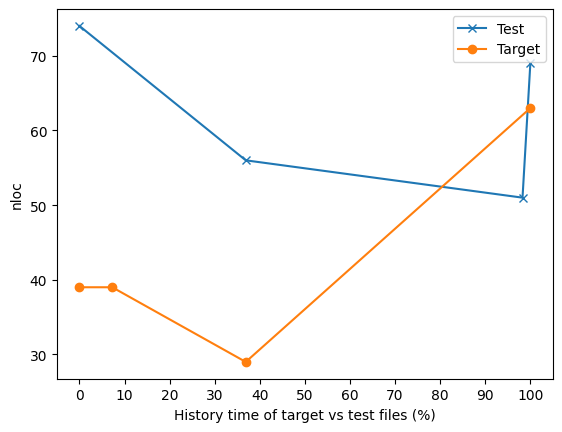

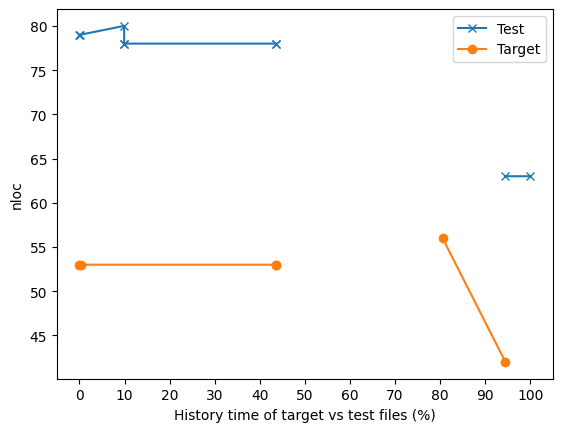

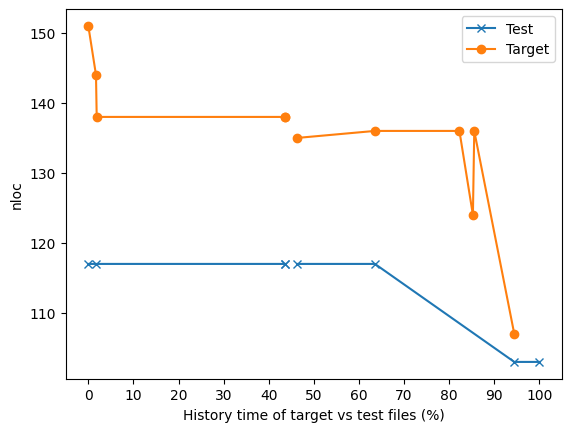

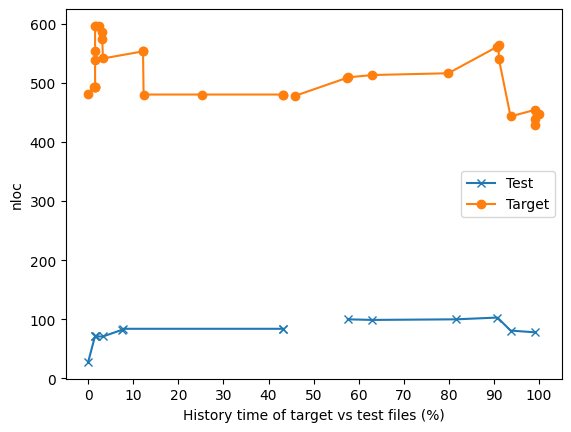

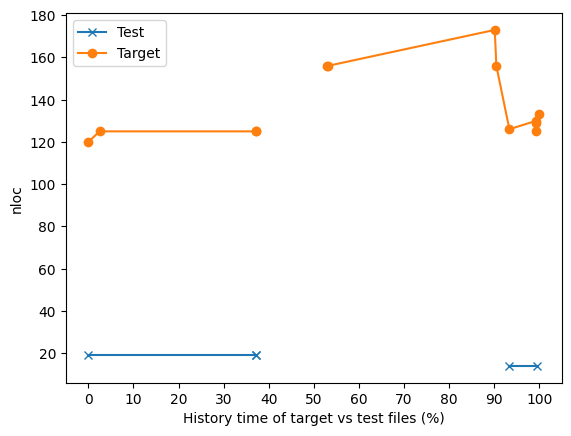

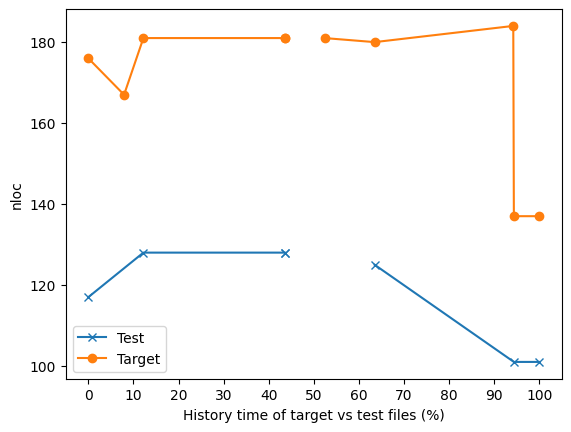

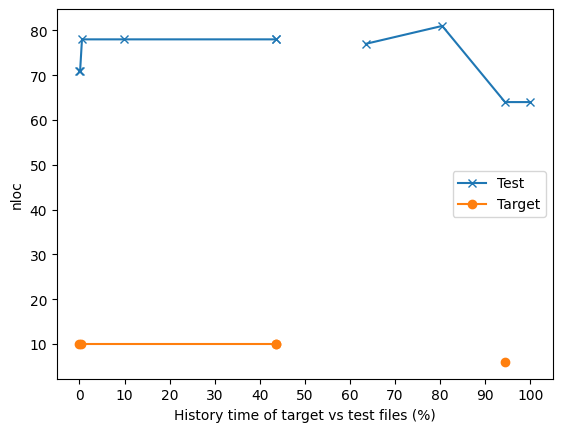

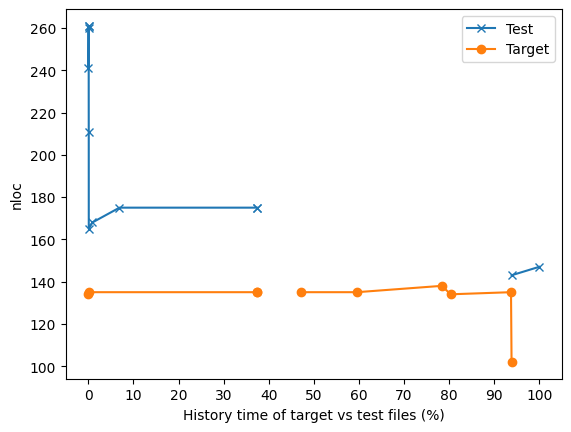

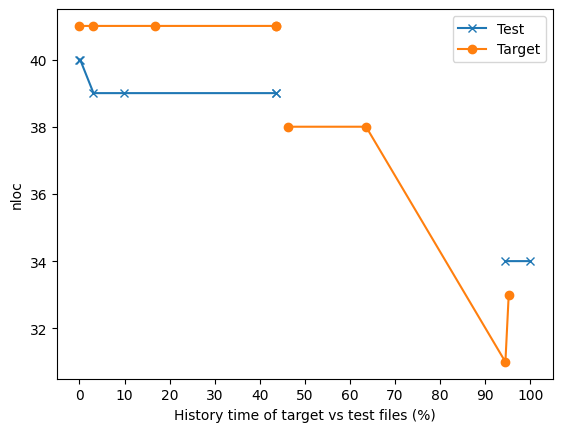

In [10]:
for map_ in map_same[:10]:
    plot_lines_test_vs_target_normalise_100(map_['test'], map_['target'], "nloc")